# Projeto

## Classification

## Naive Bayes Approach

In [1]:
import dslabs_functions as dslabs
import numpy as np
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from matplotlib.pyplot import figure, savefig, show
import dslabs_functions as dslabs

file_tag = "Credit_Score"
## Train - resultado do balancing escolhido (over no nosso caso)
train_filename = "data_preparation_final_results_1/data_preparation_csvs/balancing_csvs/data_balancing_alt2_over.csv"
## ficheiro Teste ao qual nao fazemos balancing
test_filename = "data_preparation_final_results_1/data_preparation_csvs/feat_eng_csvs/test_data_feat_select_alt3_RFE.csv"
target = "Credit_Score"
# default
eval_metric = "accuracy"

trnX, tstX, trnY, tstY, labels, vars = dslabs.read_train_test_from_files(
    train_filename, test_filename, target
)
print(f"Train#={len(trnX)} Test#={len(tstX)}")
print(f"Labels={labels}")

Train#=113752 Test#=20000
Labels=[0.0, 1.0]


## Study Naive Bayes Alternatives (can't use MultinomialNB - doesn't work over variables with negative values)

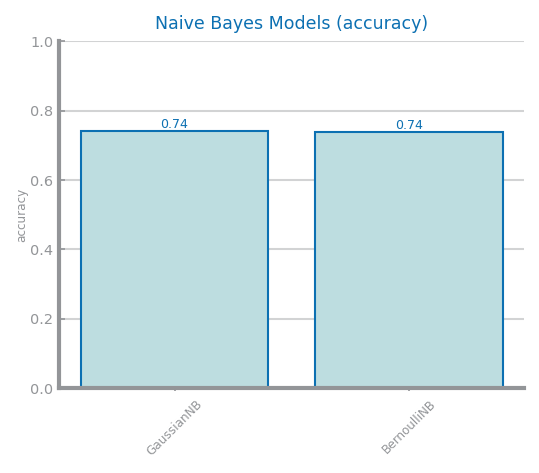

In [9]:
#CLASS_EVAL_METRICS = ["accuracy", "recall", "precision", "auc", "f1"]
eval_metric="accuracy"
figure()
best_model, params = dslabs.naive_Bayes_study(trnX, trnY, tstX, tstY, eval_metric)
savefig(f"classification_images/nb/{file_tag}_nb_{eval_metric}_study.png")
show()

## Performance Analysis
*Since Naive Bayes does not result from specializations of simpler models, the overfitting study is not usual.*

<Figure size 600x450 with 0 Axes>

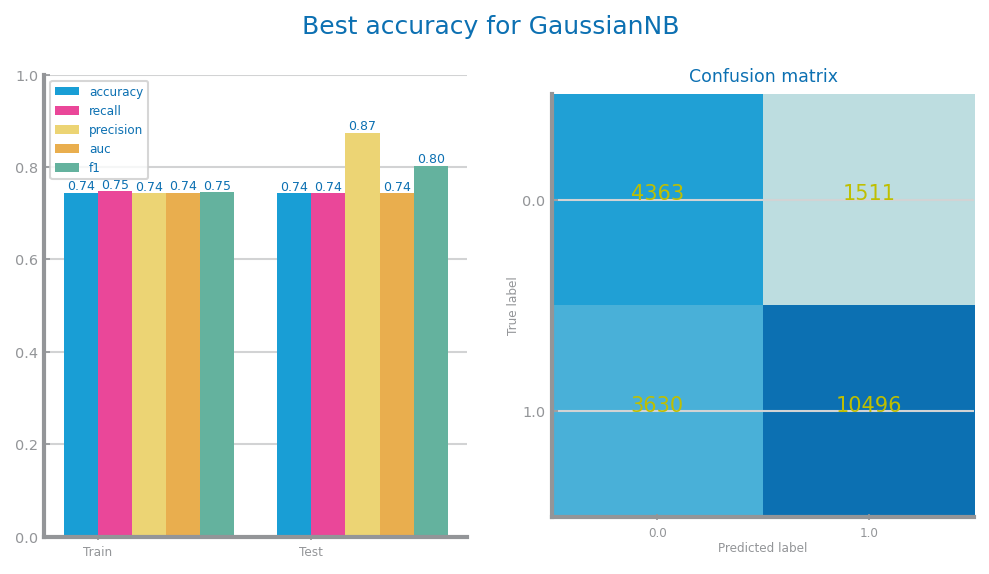

In [11]:
prd_trn: np.array = best_model.predict(trnX)
prd_tst: np.array = best_model.predict(tstX)
figure()
dslabs.plot_evaluation_results(params, trnY, prd_trn, tstY, prd_tst, labels)
savefig(f'classification_images/nb/{file_tag}_{params["name"]}_best_{params["metric"]}_eval.png')
show()

### DS LABS - Classification Evaluation (NAO INTERESSA)

In [ ]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure, show, savefig, subplots
from sklearn.model_selection import train_test_split
import dslabs_functions as dslabs
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import RocCurveDisplay
from config import ACTIVE_COLORS

In [ ]:
file_tag = "Credit_Score"
target = "Credit_Score"
data_feat_select: pd.DataFrame = pd.read_csv("data_preparation_final_results_1/data_preparation_csvs/feat_eng_csvs/data_feat_select_alt3_RFE.csv", sep=',', decimal='.')
labels: list = list(data_feat_select[target].unique())
labels.sort()
print(f"Labels={labels}")

positive: int = 1
negative: int = 0
values: dict[str, list[int]] = {
    "Original": [
        len(data_feat_select[data_feat_select[target] == negative]),
        len(data_feat_select[data_feat_select[target] == positive]),
    ]
}

y: np.array = data_feat_select.pop(target).to_list()
X: np.ndarray = data_feat_select.values

print(values)

In [ ]:
file_tag = "Credit_Score"
target = "Credit_Score"
trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.8, stratify=y)

train: pd.DataFrame = pd.concat(
    [pd.DataFrame(trnX, columns=data_feat_select.columns), pd.DataFrame(trnY, columns=[target])], axis=1
)
#train.to_csv(f"data/{file_tag}_train.csv", index=False)

test: pd.DataFrame = pd.concat(
    [pd.DataFrame(tstX, columns=data_feat_select.columns), pd.DataFrame(tstY, columns=[target])], axis=1
)
#test.to_csv(f"data/{file_tag}_test.csv", index=False)

values["Train"] = [
    len(train[train[target] == negative]),
    len(train[train[target] == positive]),
]
values["Test"] = [
    len(test[test[target] == negative]),
    len(test[test[target] == positive]),
]

figure(figsize=(6, 4))
dslabs.plot_multibar_chart(labels, values, title="Data distribution per dataset")
show()

In [ ]:
file_tag = "Credit_Score"
target = "Credit_Score"
train_filename = "data_preparation_final_results_1/data_preparation_csvs/feat_eng_csvs/train_data_feat_select_alt3_RFE.csv"
test_filename = "data_preparation_final_results_1/data_preparation_csvs/feat_eng_csvs/test_data_feat_select_alt3_RFE.csv"

eval_metric = "accuracy"

trnX: np.ndarray
tstX: np.ndarray
trnY: np.array
tstY: np.array
labels: list
vars: list
trnX, tstX, trnY, tstY, labels, vars = dslabs.read_train_test_from_files(
    train_filename, test_filename, target
)
print(f"Train#={len(trnX)} Test#={len(tstX)}")
print(f"Labels={labels}")

### Example: Best accuracy for GaussianNB

In [ ]:
file_tag = "Credit_Score"
target = "Credit_Score"
model_description: dict = {"name": "GaussianNB", "metric": eval_metric, "params": ()}

clf = GaussianNB()
clf.fit(trnX, trnY)
pred_trnY: np.array = clf.predict(trnX)
print(f"Score over Train: {clf.score(trnX, trnY):.3f}")
print(f"Score over Test: {clf.score(tstX, tstY):.3f}")

prd_trn: np.array = clf.predict(trnX)
prd_tst: np.array = clf.predict(tstX)
figure()
dslabs.plot_evaluation_results(model_description, trnY, prd_trn, tstY, prd_tst, labels)
savefig(
    f'classification_images/{file_tag}_{model_description["name"]}_best_{model_description["metric"]}_eval.png'
)

show()

In [ ]:
prdY: np.array = clf.predict(tstX)
figure()
dslabs.plot_roc_chart(tstY, {"GaussianNB": prdY}, target=target)
show()